SENTIMENT ANALYSIS - Sentiment analysis studies the subjective information in an
expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or
entity. Expressions can be classified as positive, negative, or neutral. For example: “I really
like the new design of your website!” → Positive.
• You are provided with a dataset of the ‘restaurant review’ taken from kaggle. Build a
machine learning model by using Support vector classifier(SVM) and count vectorizer using
two methods to predict the label of the review either positive or negative


In [ ]:
import pandas as pd

In [ ]:
# https://www.kaggle.com/d4rklucif3r/restaurant-reviews
df = pd.read_table('/content/Restaurant_Reviews.tsv')      # reading the data from the dataset
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()              # it gives the complete information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape     # (rows , columns)

(1000, 2)

In [ ]:
df.size      # (rows*columns)

2000

In [ ]:
df = df.drop_duplicates(keep = 'last')     # drops the duplicated values from the dataset
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['Review'][995]

'I think food should have flavor and texture and both were lacking.'

In [ ]:
df['Liked'][995]

0

In [ ]:
df['Review'][546]

'Last night was my second time dining here and I was so happy I decided to go back!'

In [ ]:
df['Liked'][546]

1

In [ ]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

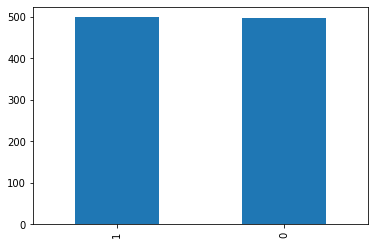

In [ ]:
df['Liked'].value_counts().plot(kind='bar')           # data visualization using pandas plot

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


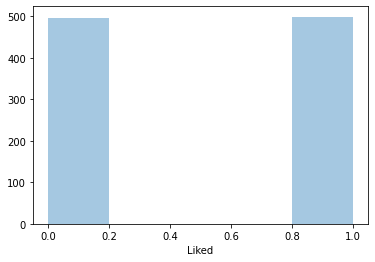

In [ ]:
sns.distplot(df['Liked'],kde=False)

In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
df.shape

(996, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(747,)

In [ ]:
x_test.shape

(249,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # applying TfidfVectorizer (or) bag of words technique

In [ ]:
vect = TfidfVectorizer(stop_words='english')      # TfidfVectorizer is a Feature extraction technique
x_train_vect = vect.fit_transform(x_train)        # this method yeilds better results than CountVectorizer
x_test_vect = vect.transform(x_test) 

In [ ]:
x_train_vect.toarray()       # all the text is converted into numerical values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#METHOD 1
from sklearn.svm import SVC   #from support vector machines import support vector classifier
model = SVC()
model.fit(x_train_vect,y_train) 

SVC()

In [ ]:
y_pred = model.predict(x_test_vect)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7309236947791165

In [ ]:
# METHOD 2 - using pipelines 
# pipeline is used to combine multiple estimators/ combine two processes together

# SVC + TfidfVectorizer 
# if we use the pipeline we need not transform the values manually, pipelines takes care of this 

In [ ]:
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(TfidfVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

In [ ]:
accuracy_score(y_pred2,y_test)

0.8192771084337349

In [ ]:
# METHOD 3 -- USING NAIVE BAYES 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

In [ ]:
accuracy_score(y_pred3,y_test)

0.7389558232931727

In [ ]:
#METHOD 4 -- NB + TfidfVectorizer pipeline
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(TfidfVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
y_pred4 = model4.predict(x_test)
y_pred4

In [ ]:
accuracy_score(y_pred4,y_test)

0.7831325301204819

In [ ]:
# accuracy score - 0.7309236947791165  (SVC)                        # METHOD 1 
# accuracy score - 0.8192771084337349  (SVC pipeline)               # METHOD 2
# accuracy score - 0.7389558232931727  (MultinomialNB)              # METHOD 3
# accuracy score - 0.7831325301204819  (MultinomialNB pipeline)     # METHOD 4

Creating WEBAPP using this model 

In [ ]:
import joblib
joblib.dump(model2,'Sentiment-Analysis')

['Sentiment-Analysis']

In [ ]:
reload_model = joblib.load('Sentiment-Analysis')

In [ ]:
reload_model.predict(['Last night was my second time dining here and I was so happy I decided to go back!'])

array([1])

In [ ]:
reload_model.predict(['I think food should have flavor and texture and both were lacking.'])

array([0])

In [ ]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SENTIMENT-ANALYSIS")
reload_model = joblib.load('Sentiment-Analysis')

ip = st.text_input("Enter the text/statement :")
op = reload_model.predict([ip])

# returns 1 for positive statement and 0 for negative statement.
if st.button('ANALYZE'):
  st.title(op[0])


Overwriting app.py


In [ ]:
#to run this streamlit web application 
!streamlit run app.py & npx localtunnel --port 8501    
# external link using port forwarding service of localtunnel is used

2022-04-08 16:36:26.310 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.916s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.191.208:8501

your url is: https://fresh-starfish-55.loca.lt
  Stopping...
^C
